In [14]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['darkorange', 'c'])


# The Iris flower data set consists of 50 samples from each of three species of Iris 
# (1) Iris setosa, 
# (2) Iris virginica,
# (3) Iris versicolor. 
#
# Four features were measured from each sample: 
# (1) length of the sepals (cm)
# (2) length of the petals (cm)
# (3) width of the sepals  (cm)
# (4) width of the petals  (cm)
#
# We will use on two features because it is easy to visualize 2-dimensional data.
# Problem Statement:
# Based on the combination of these four features, we need to build k-nn classifier
iris = datasets.load_iris()
X = iris.data[:, 0:2]
Y = iris.target

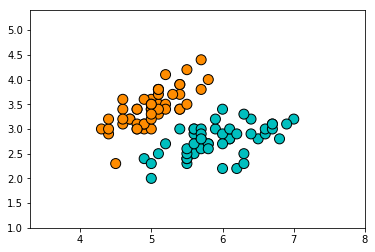

In [15]:
indices = Y!=2
X,Y = X[indices,:], Y[indices]

# Lets visualize the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(X[:,0].min() - 1, X[:,0].max() + 1)
plt.ylim(X[:,1].min() - 1, X[:,1].max() + 1)
plt.show()

In [16]:
# split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [32]:
# First we will manually work through the algorithm and later use sklearn to check our results

# Define our parameters
k = 1 # neighbors
acc = 0

# loop through all my test points
for i in range(X_test.shape[0]):
    i_star = None
    d_star = float('inf') # initialize d_star to infinite
    
    # loop over all training points to find the nearest point
    for j in range(X_train.shape[0]):
        # compute the distance between train point and test points
        d = np.linalg.norm(X_train[j,:] - X_test[i,:])
        if d < d_star:
            i_star = j # set i_star to the train index
            d_star = d # distance to the closes training point
            
    y_pred = Y_train[i_star] # predict the label of the test point use that of the nearest                                     point 
    if y_pred == Y_test[i]:
        acc += 1 

print(f"Accuracy:{acc/X_test.shape[0]}")

Accuracy:1.0


In [33]:
# define sklearn model
clf = neighbors.KNeighborsClassifier(1)
# call fit function
# is there any training here?
# No!
# 
clf.fit(X_train, Y_train)
# call score function
clf.score(X_test, Y_test)

1.0

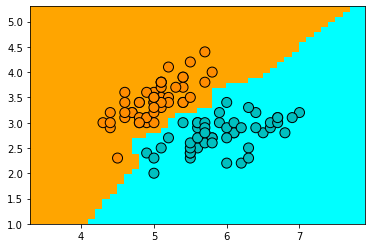

In [13]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()